<h1>IR Assignment 2 - 41117 (P1)</h1>

<b>Implement Page Rank Algorithm</b>

In [1]:
import networkx as nx # For network analysis

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # For visualization

import operator
import random as rd

Create a directed graph with 25 nodes and 0.6 probability of two nodes having an edge between them

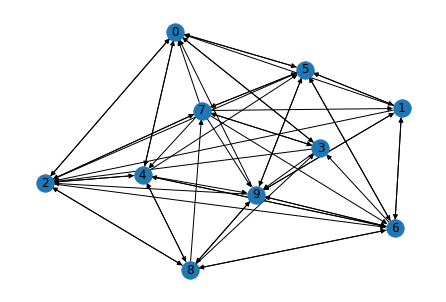

In [2]:
# Create a directed graph
g=nx.gnp_random_graph(10,0.6,directed=True)

# Plot the graph
nx.draw(g,with_labels=True)
plt.show()

In [3]:
#number of nodes for graph
n=g.number_of_nodes()
print(n)

10


In [4]:
# Print Neighbours of each node
for i in range(n):
    print("Node", i,"-",end=" ")
    print(list(g.neighbors(i)))

Node 0 - [2, 3, 4, 5]
Node 1 - [0, 2, 5, 6, 9]
Node 2 - [0, 4, 6, 7, 8]
Node 3 - [0, 2, 7, 9]
Node 4 - [0, 2, 5, 6, 8, 9]
Node 5 - [0, 1, 2, 6, 7, 9]
Node 6 - [1, 3, 4, 5, 8, 9]
Node 7 - [0, 1, 2, 3, 4, 5, 6, 9]
Node 8 - [2, 3, 4, 6, 7, 9]
Node 9 - [0, 1, 2, 5, 6, 8]


In [5]:
# Dictionary key: node and value: random walk score
rank_d={}

# Take a random start node:
x=rd.randint(0,n)

# Initialize score of each node = 0
for j in range(0,n):
  rank_d[j]=0

# Increment score of starting node
rank_d[x]=rank_d[x]+1

# Iterate and update score
for i in range(1000):
  # List of neighbour nodes
  n_list=list(g.neighbors(x))
    
  # If no neighbours are found take another node and start again
  if(len(n_list)==0):
    x=rd.randint(0,10)
    rank_d[x]=rank_d[x]+1
    
  #If neighbours are found, choose a random node from the list
  else:
    x=rd.choice(n_list)
    rank_d[x]=rank_d[x]+1

print(n_list)
print("Random Walk Score Updated")

[0, 4, 6, 7, 8]
Random Walk Score Updated


Divide by number of iterations to normalize score

In [6]:
for j in range(0,10):
  rank_d[j]=rank_d[j]/1000

Sort the dictionary by walk score

In [7]:
rank_d_sorted=sorted(rank_d.items(),key=lambda v:(v[1],v[0]),reverse=True)
score_list = 0

# Print PageRank
for i in rank_d_sorted:
    print(i, end=" ")
    score_list += i[1]

print("\n")
print("Sum of walk scores =", score_list)

(2, 0.144) (6, 0.122) (0, 0.117) (9, 0.104) (5, 0.104) (4, 0.094) (7, 0.092) (8, 0.084) (3, 0.07) (1, 0.07) 

Sum of walk scores = 1.001


Print pages according to ranks

In [8]:
n=1
for i in rank_d_sorted:
    print("Rank", n,":", i[0])
    n+=1

Rank 1 : 2
Rank 2 : 6
Rank 3 : 0
Rank 4 : 9
Rank 5 : 5
Rank 6 : 4
Rank 7 : 7
Rank 8 : 8
Rank 9 : 3
Rank 10 : 1
